# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [105]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [11]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

label_names = pd.read_csv("data/signnames.csv")
label_names = label_names.SignName

In [4]:
# In the folowing code, we will have a look at each sign from the 43 classes, chosen at random
def plot_images(sample_images, true_label=None, pred_label=None):
    
    # Create figure with 9x5 sub-plots.
    fig, axes = plt.subplots(15, 3, figsize=(18,50))
    fig.subplots_adjust(hspace=1, wspace=0.3)
    channels = sample_images.shape[:-1]
    for i, ax in enumerate(axes.flat):
        # Plot image.
        if i < len(sample_images):
            if channels == 3:
                ax.imshow(sample_images[i])
            else:
                ax.imshow(sample_images[i].squeeze(), cmap='gray')
            
            # TO-DO: Show true and predicted classes
            if true_label != None:
                if pred_label != None:
                    sign = "True: {0}\nPred: {1}".format(label_names[true_label[i]],label_names[pred_label[i]])
                else:
                    sign = "True: {}".format(label_names[true_label[i]])
                ax.set_title(sign)
            # Show the classes as the label on the x-axis.

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [5]:
# show each sample from all classes, selected at random
sample_shape = [n_classes]
sample_shape.extend(list(image_shape))
sample_images = np.zeros(sample_shape)
sample_labels = []

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    sample_labels.append(i)

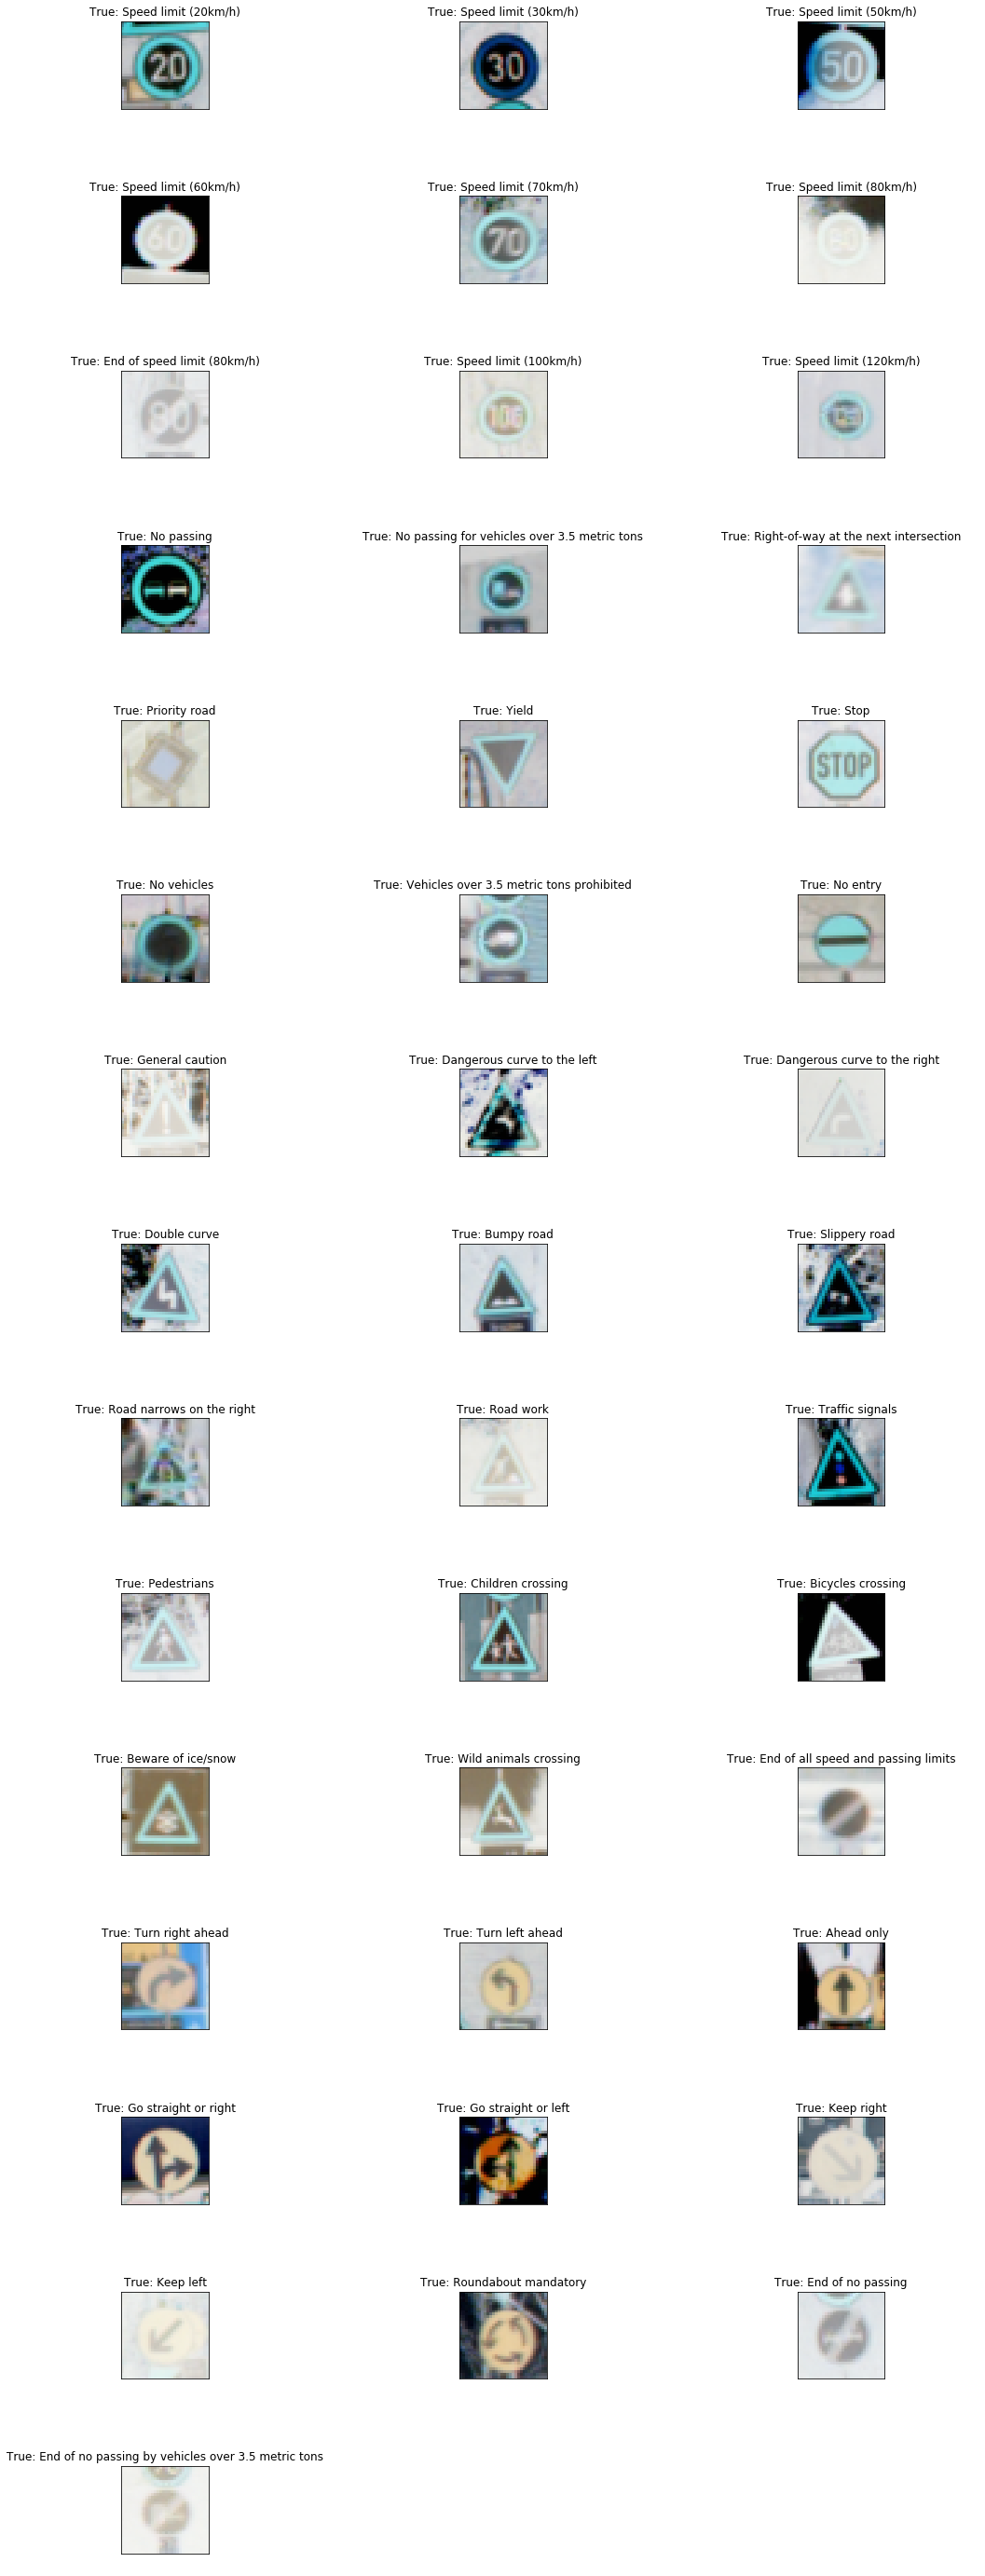

In [6]:
plot_images(sample_images, sample_labels)

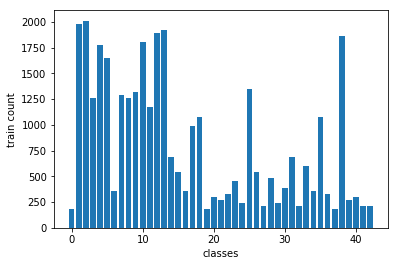

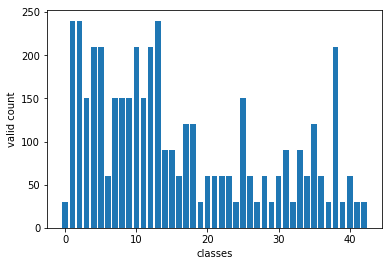

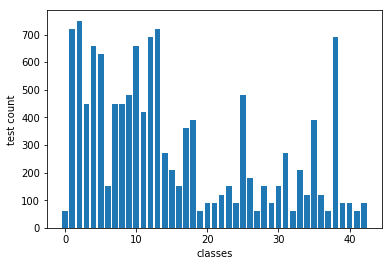

In [7]:
# plot the distribution of the data across the classes
yTrainCount = np.bincount(y_train)
plt.bar(range(len(yTrainCount)), yTrainCount)
plt.xlabel('classes')
plt.ylabel('train count')
plt.show()

yValidCount = np.bincount(y_valid)
plt.bar(range(len(yValidCount)), yValidCount)
plt.xlabel('classes')
plt.ylabel('valid count')
plt.show()

yTestCount = np.bincount(y_test)
plt.bar(range(len(yTestCount)), yTestCount)
plt.xlabel('classes')
plt.ylabel('test count')
plt.show()

#### Remark:
One interesting observation about these images is that many of them are very dull in contrast and brightness. Thus, it will be a good idea to apply Contrast Limited Adaptive Histogram Equalization (CLAHE). This could, in turn, help in the higher accuracy of the classifier.

Moreover, the data is also highly skewed. Thus, it would be a good idea to add random variations of the images with lower count classes. For this, combining the train and validation data would be a good idea. They can be split again later.


In [8]:
# use tensorflow to convert to grayscale images
import tensorflow as tf
import cv2

In [9]:
data_sess = tf.Session()

In [10]:
X_train_gray = tf.image.rgb_to_grayscale(X_train)
with data_sess.as_default():
    X_train_gray = X_train_gray.eval()

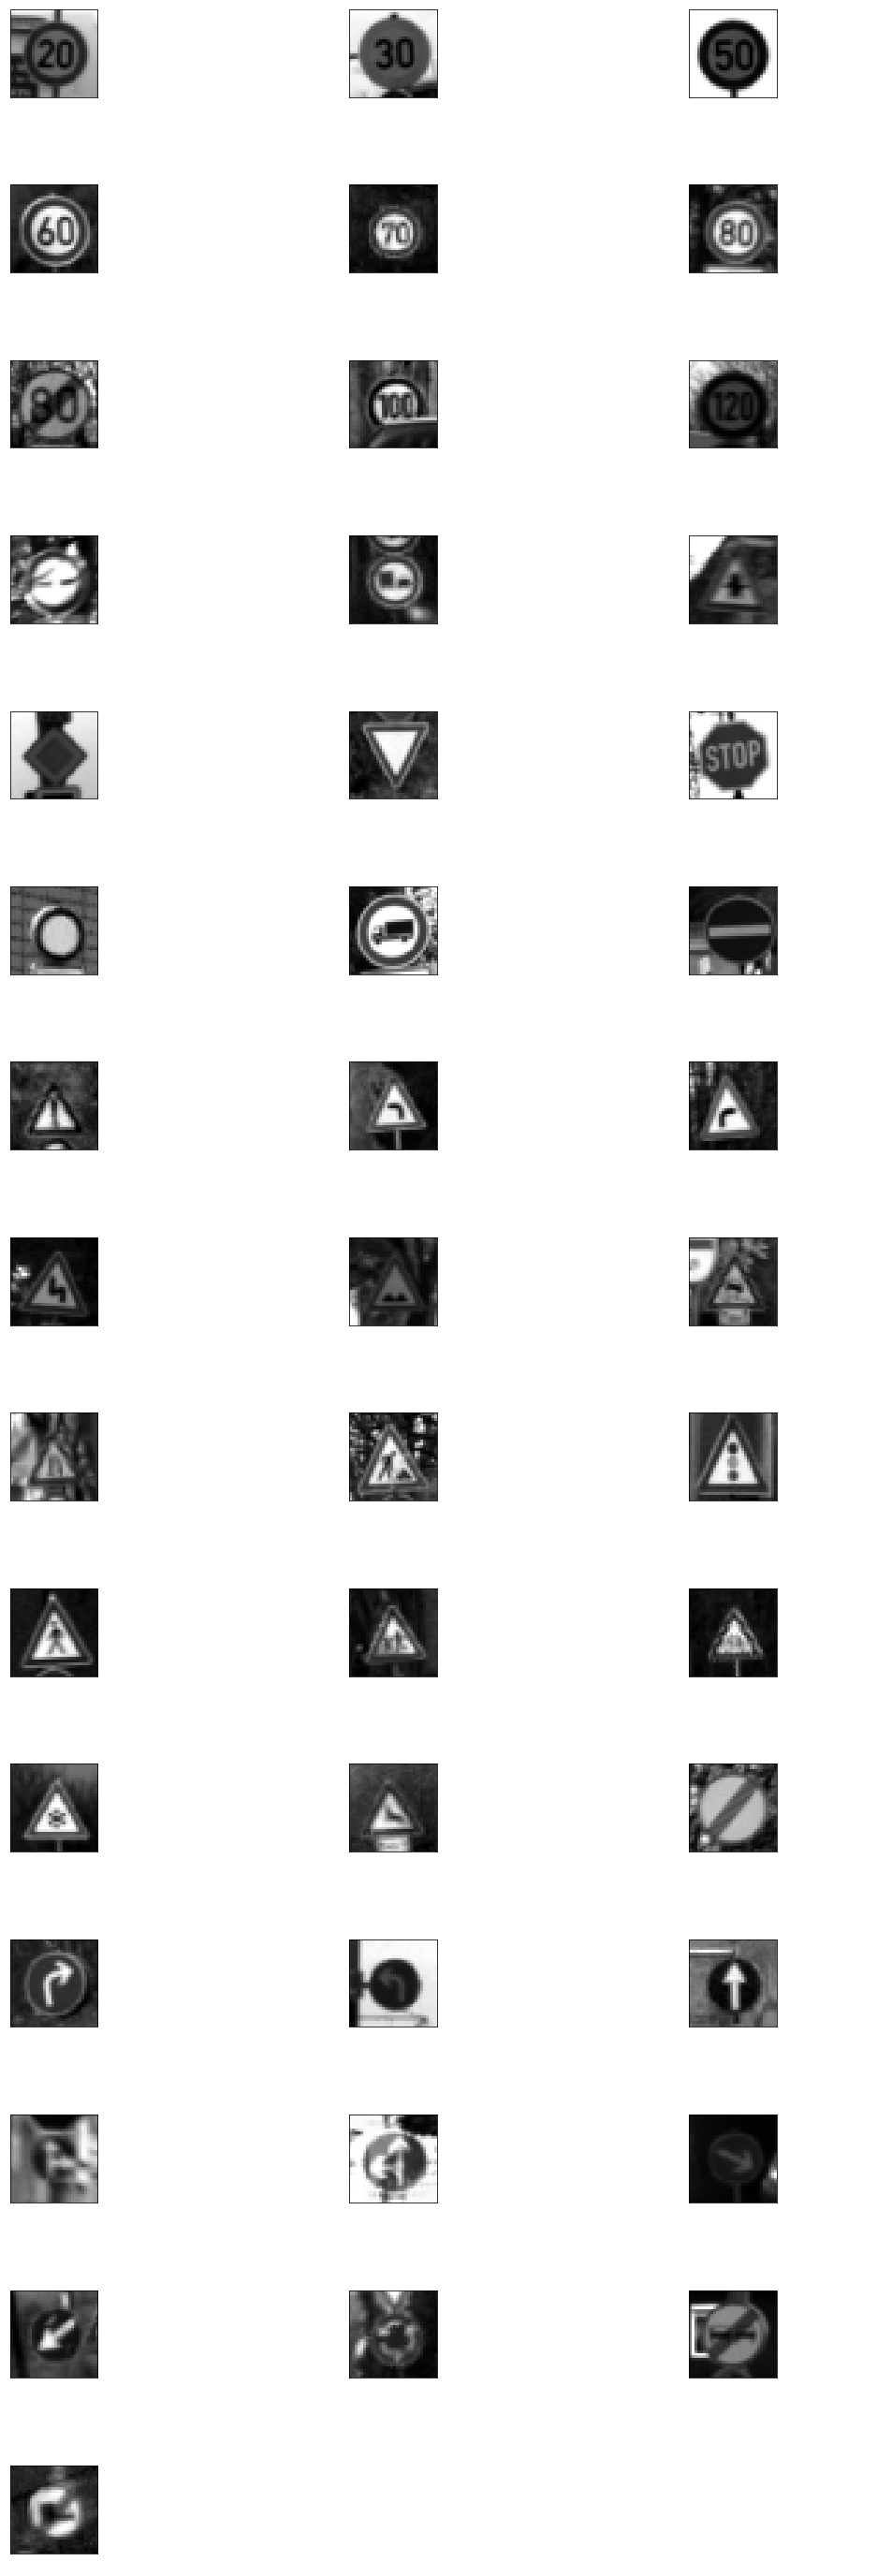

In [11]:
gray_image_shape = X_train_gray[0].shape
gray_sample_shape = [n_classes]
gray_sample_shape.extend(list(gray_image_shape))
sample_images = np.zeros(gray_sample_shape)

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train_gray[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    
plot_images(sample_images)

Looks like grayscale images capture better information about each sign than the RGB images. We should now convert the train and validation images to the grayscale.

In [12]:
X_train = X_train_gray

X_valid_gray = tf.image.rgb_to_grayscale(X_valid)
with data_sess.as_default():
    X_valid = X_valid_gray.eval()
    
X_test_gray = tf.image.rgb_to_grayscale(X_test)
with data_sess.as_default():
    X_test = X_test_gray.eval()

In [13]:
data_sess.close()

Apply the CLAHE by using opencv function

In [3]:
def applyCLAHE(X_imgs, clipLimit=0.01, gridSize=(4,4)):
    X_imgs_histeq = []
    for idx in range(len(X_imgs)):
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=gridSize)
        img = clahe.apply(X_imgs[idx])
        X_imgs_histeq.append(img)

    X_imgs_histeq = np.array(X_imgs_histeq)
    return X_imgs_histeq

In [15]:
X_train_clhae = applyCLAHE(X_train, clipLimit=0.1, gridSize=(2,2))
X_valid_clhae = applyCLAHE(X_valid, clipLimit=0.1, gridSize=(2,2))
X_test_clhae = applyCLAHE(X_test, clipLimit=0.1, gridSize=(2,2))

Plot the transformed set of images.

In [16]:
sample_shape = [n_classes]
sample_shape.extend(list(image_shape)[:-1])
sample_images = np.zeros(sample_shape)
sample_labels = []

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train_clhae[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    sample_labels.append(i)

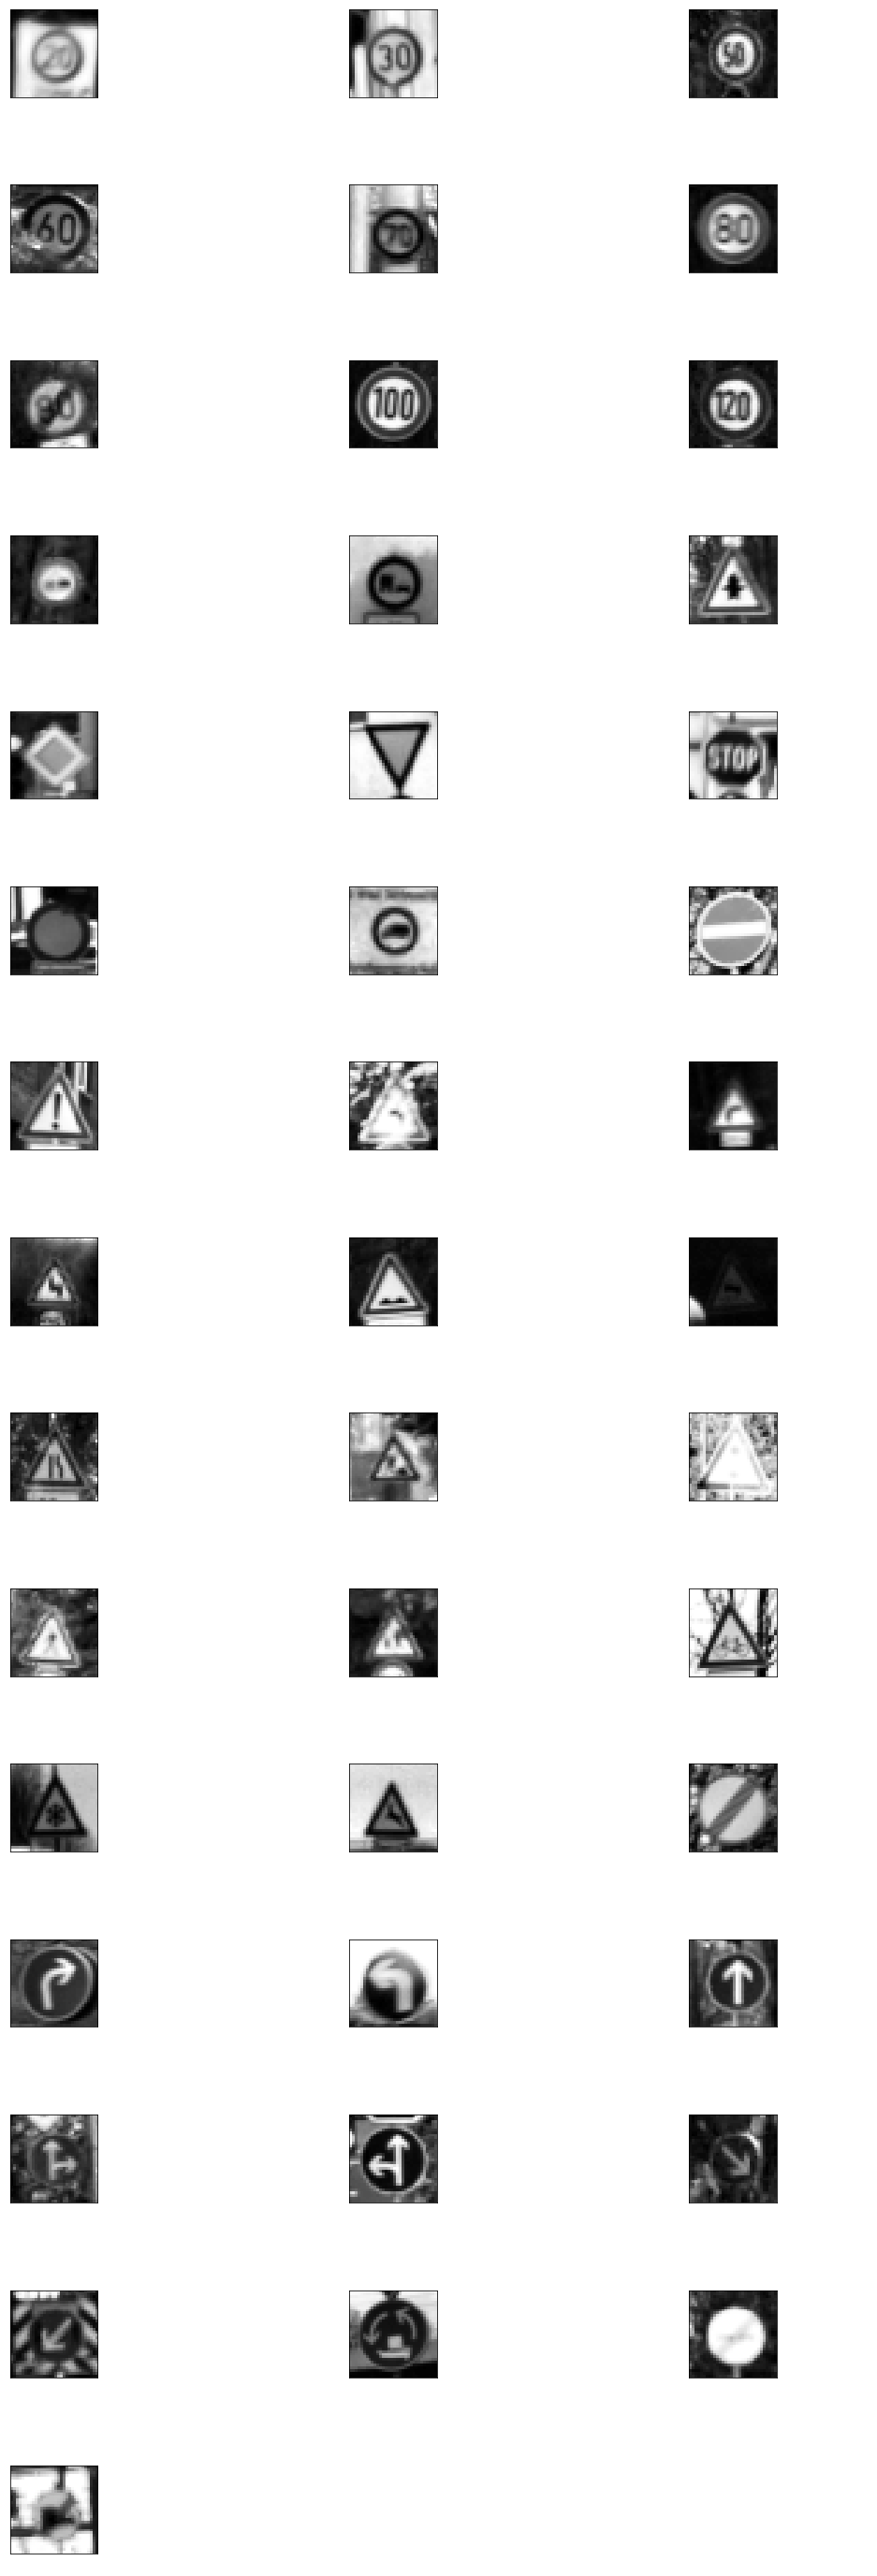

In [17]:
plot_images(sample_images)

These are much better than any other representation.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

I really wanted to use Tensorflow library functions for data augmentation and I found [this](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9) reference a lot useful for setting up the pipeline.

More specifically, I plan to use scaling and translation for data augmentation.

In [4]:
def normalize(X_imgs, maxT, minT):
    minI = np.min(X_imgs)
    maxI = np.max(X_imgs)
    return (X_imgs - minI) * (maxT- minT) / (maxI-minI) + minT

In [ ]:
X_train = normalize(X_train_clhae, 0.5, -0.5)
X_valid = normalize(X_valid_clhae, 0.5, -0.5)
X_test = normalize(X_test_clhae, 0.5, -0.5)

Let's look at the training data samples again.

In [19]:
sample_shape = [n_classes]
sample_shape.extend(list(image_shape)[:-1])
sample_images = np.zeros(sample_shape)
sample_labels = []

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    sample_labels.append(i)

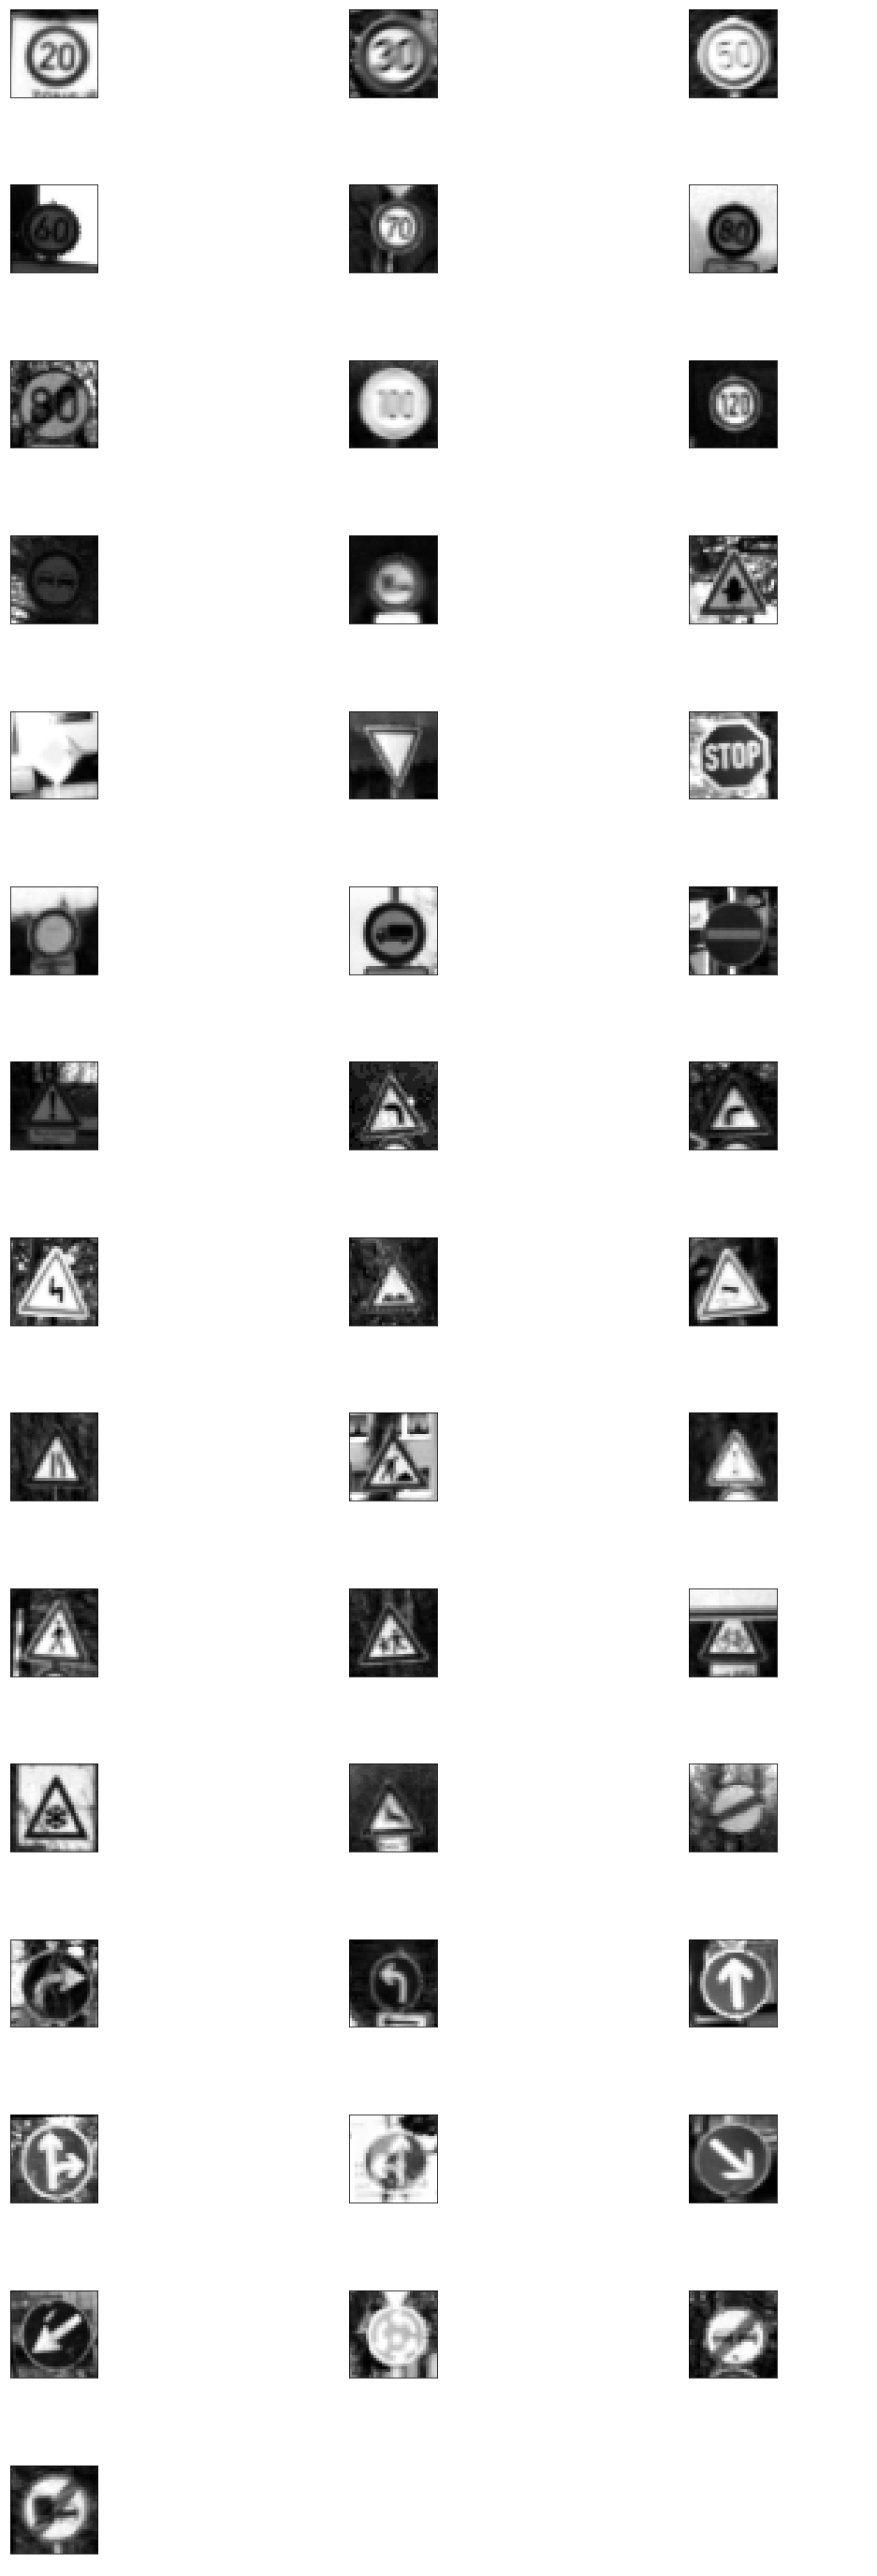

In [20]:
plot_images(sample_images)

In [21]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [22]:
# Function for generating a random translation of the image.
def randomTranslate(img):
    img = img.squeeze()
    r, c = img.shape
    factor = 3
    tx, ty = np.random.randint(-factor, factor+1, 2)
    M = np.float32([[1, 0, tx],
                    [0, 1, ty]])
    res = cv2.warpAffine(img, M, (c, r), cv2.INTER_LINEAR, cv2.BORDER_WRAP)
    return res

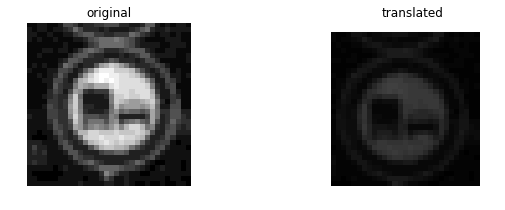

In [23]:
test_img = X_train[np.random.randint(len(X_train))]

test_res = randomTranslate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_res.squeeze(), cmap='gray')
axs[1].set_title('translated')

plt.show()

In [24]:
# Function for generating a random scale of the image.
def randomScale(img):
    img = img.squeeze()
    r, c = img.shape
    factor = 3
    s = np.random.randint(-factor, factor+1)
    if s == 0:
        s+=1;
    pt1 = np.float32([[s  ,   s],
                      [r-s,   s],
                      [s  , c-s],
                      [r-s, c-s]])
    pt2 = np.float32([[0, 0],
                      [r, 0],
                      [0, c],
                      [r, c]])
    M = cv2.getPerspectiveTransform(pt1,pt2)
    res = cv2.warpPerspective(img, M, (c, r), cv2.INTER_LINEAR, cv2.BORDER_WRAP)
    return res

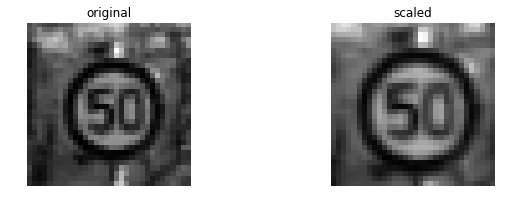

In [25]:
test_img = X_train[np.random.randint(len(X_train))]

test_res = randomScale(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_res.squeeze(), cmap='gray')
axs[1].set_title('scaled')

plt.show()

In [26]:
# Function for generating a random rotation of the image.
def randomRotate(img):
    img = img.squeeze()
    r, c = img.shape
    factor = 15
    deg = np.random.randint(-factor, factor+1)
    if deg == 0:
        deg += 1
    
    M = cv2.getRotationMatrix2D((c/2, r/2), deg, 1)
    res = cv2.warpAffine(img, M, (c, r), cv2.INTER_LINEAR, cv2.BORDER_WRAP)
    return res

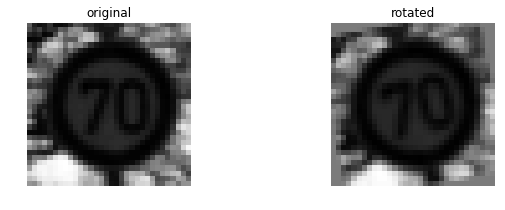

In [27]:
test_img = X_train[np.random.randint(len(X_train))]

test_res = randomRotate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_res.squeeze(), cmap='gray')
axs[1].set_title('rotated')

plt.show()

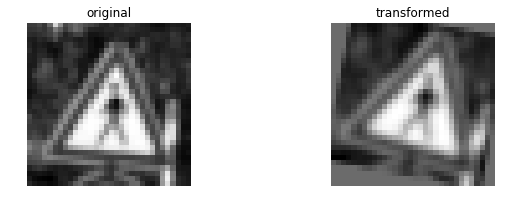

In [28]:
# A combination of all these
test_img = X_train[np.random.randint(len(X_train))]

test_res = randomRotate(randomTranslate(randomScale((test_img))))

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_res.squeeze(), cmap='gray')
axs[1].set_title('transformed')

plt.show()

In [29]:
X = X_train
y = y_train

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 43 Patch objects>)

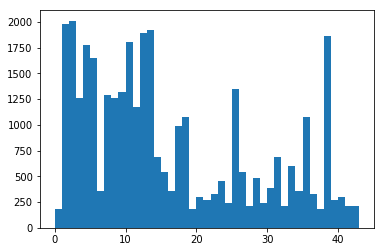

In [30]:
plt.hist(y, bins=range(n_classes+1))

In [31]:
# augment data to the training set
samplePerCls = 2200
for cls in range(n_classes):
    print("Augmenting class {}".format(cls))
    idxs = np.where(y == cls)
    n_samples = len(idxs[0])
    if n_samples < samplePerCls:
        X_tmp = np.zeros((samplePerCls - n_samples, image_shape[0], image_shape[1]))
        for i in range(samplePerCls - n_samples):
            new_img = X[idxs[0][i % n_samples]]
            new_img = randomRotate(randomTranslate(randomScale((new_img))))
            X_tmp[i, :, :] = new_img
        X = np.concatenate((X, X_tmp), axis=0)
        y = np.concatenate((y, (samplePerCls - n_samples) * [cls]), axis=0)

Augmenting class 0
Augmenting class 1
Augmenting class 2
Augmenting class 3
Augmenting class 4
Augmenting class 5
Augmenting class 6
Augmenting class 7
Augmenting class 8
Augmenting class 9
Augmenting class 10
Augmenting class 11
Augmenting class 12
Augmenting class 13
Augmenting class 14
Augmenting class 15
Augmenting class 16
Augmenting class 17
Augmenting class 18
Augmenting class 19
Augmenting class 20
Augmenting class 21
Augmenting class 22
Augmenting class 23
Augmenting class 24
Augmenting class 25
Augmenting class 26
Augmenting class 27
Augmenting class 28
Augmenting class 29
Augmenting class 30
Augmenting class 31
Augmenting class 32
Augmenting class 33
Augmenting class 34
Augmenting class 35
Augmenting class 36
Augmenting class 37
Augmenting class 38
Augmenting class 39
Augmenting class 40
Augmenting class 41
Augmenting class 42


Now, let's shuffle the data.

In [32]:
X_train, y_train = shuffle(X, y)
# X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3)

In [33]:
print("X_train shape: {}".format(X_train.shape))
print("Total images: {}".format(len(y_train)))

X_train shape: (94600, 32, 32)
Total images: 94600


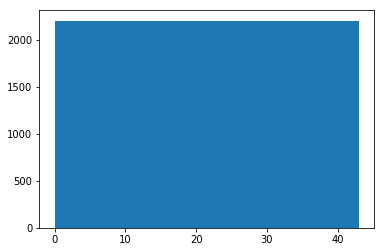

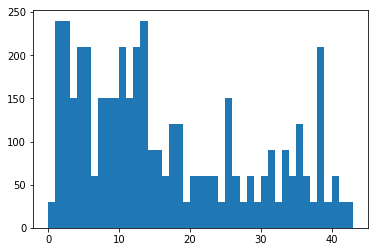

In [34]:
plt.hist(y_train, bins=range(n_classes+1))
plt.show()
plt.hist(y_valid, bins=range(n_classes+1))
plt.show()

In [35]:
if X_train[0].shape != 3:
    X_train = np.expand_dims(X_train, 3)
if X_valid[0].shape != 3:
    X_valid = np.expand_dims(X_valid, 3)
if X_test[0].shape != 3:
    X_test = np.expand_dims(X_test, 3)

In [36]:
## Save this augmented and preprocessed data into pickle file so that next time can start from the next cell.
# Save all train, valid and test data
train['features'] = X_train
train['labels'] = y_train
with open('train_data.augmented.p', 'wb') as f_train:
    pickle.dump(train, f_train)
f_train.close()

In [39]:
valid['features'] = X_valid
valid['labels'] = y_valid
with open('validation_data.augmented.p', 'wb') as f_valid:
    pickle.dump(valid, f_valid)
f_valid.close()

In [38]:
test['features'] = X_test
test['labels'] = y_test
with open('test_data.augmented.p', 'wb') as f_test:
    pickle.dump(test, f_test)
f_test.close()

### Load the augmented data and then use it for the training

In [13]:
import pickle
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

In [15]:
training_file = 'data/train_data.augmented.p'
validation_file= 'data/validation_data.augmented.p'
testing_file = 'data/test_data.augmented.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

### Model Architecture

There were several models tried. VGG like, LeNet and Sermanet. 

In [93]:
## Define your architecture here.
### Feel free to use as many code cells as needed.

### Use a VGG16 like idea on the Sermanet with dropout

# important to reset the graph as it was used before for data augmentation
# Add batch normalization
tf.reset_default_graph()

from tensorflow.contrib.layers import flatten

def myNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
                'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 8], mean=mu, stddev=sigma)),
                'wc2': tf.Variable(tf.truncated_normal([3, 3, 8, 8], mean=mu, stddev=sigma)),
                'wc3': tf.Variable(tf.truncated_normal([3, 3, 8, 16], mean=mu, stddev=sigma)),
                'wc4': tf.Variable(tf.truncated_normal([3, 3, 16, 16], mean=mu, stddev=sigma)),
                'wc5': tf.Variable(tf.truncated_normal([3, 3, 16, 16], mean=mu, stddev=sigma)),
                'wc6': tf.Variable(tf.truncated_normal([3, 3, 16, 600], mean=mu, stddev=sigma)),
                'wout': tf.Variable(tf.truncated_normal([1000, 43], mean=mu, stddev=sigma))
                }
    biases = {
                'bc1': tf.Variable(tf.zeros(8)),
                'bc2': tf.Variable(tf.zeros(8)),
                'bc3': tf.Variable(tf.zeros(16)),
                'bc4': tf.Variable(tf.zeros(16)),
                'bc5': tf.Variable(tf.zeros(16)),
                'bc6': tf.Variable(tf.zeros(600)),
                'bout': tf.Variable(tf.zeros(43))
                }
    
    #  Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x8.
    convLayer1 = tf.nn.conv2d(input=x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer1 = tf.nn.bias_add(convLayer1, biases['bc1'])
    #  Activation.
    convLayer1 = tf.nn.relu(convLayer1)
    #  Layer 2: Convolutional. Input = 30x30x8. Output = 28x28x8.
    convLayer2 = tf.nn.conv2d(input=convLayer1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer2 = tf.nn.bias_add(convLayer2, biases['bc2'])
    #  Activation.
    convLayer2 = tf.nn.relu(convLayer2)
    #  Pooling 1. Input = 28x28x8. Output = 14x14x8.
    pool1 = tf.nn.max_pool(value=convLayer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #  Layer 3: Convolutional. Input = 14x14x8. Output = 12x12x16.
    convLayer3 = tf.nn.conv2d(input=pool1, filter=weights['wc3'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer3 = tf.nn.bias_add(convLayer3, biases['bc3'])
    #  Activation.
    convLayer3 = tf.nn.relu(convLayer3)
    #  Layer 4: Convolutional. Input = 12x12x16. Output = 10x10x16.
    convLayer4 = tf.nn.conv2d(input=convLayer3, filter=weights['wc4'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer4 = tf.nn.bias_add(convLayer4, biases['bc4'])
    #  Activation.
    convLayer4 = tf.nn.relu(convLayer4)
    #  Pooling 2. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(value=convLayer4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #  Layer 5: Convolutional. Input = 5x5x16. Output = 3x3x16.
    convLayer5 = tf.nn.conv2d(input=pool2, filter=weights['wc5'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer5 = tf.nn.bias_add(convLayer5, biases['bc5'])
    #  Activation
    convLayer5 = tf.nn.relu(convLayer5)
    #  Layer 6: Convolutional. Input = 3x3x16. Output = 1x1x600
    convLayer6 = tf.nn.conv2d(input=convLayer5, filter=weights['wc6'], strides=[1, 1, 1, 1], padding='VALID')
    convLayer6 = tf.nn.bias_add(convLayer6, biases['bc6'])
    #  Activation
    convLayer6 = tf.nn.relu(convLayer6)
    
    #  Flatten the two layers
    flattenPool2 = flatten(pool2)
    flattenConvLayer6 = flatten(convLayer6)
    
    #  Layer 7: Concatenated fully connected layer
    fcLayer0 = tf.concat((flattenPool2, flattenConvLayer6), axis=1)
    
    #  Dropout
    fcLayer0 = tf.nn.dropout(fcLayer0, keep_prob)
    
    # Layer 8: Fully Connected. Input = 1000. Output = 43.
    logits = tf.add(tf.matmul(fcLayer0, weights['wout']), biases['bout'])
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Set the data

In [91]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

#### Define train parameters, i.e., loss and optimization functions

In [23]:
logits = myNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

## decay the learning rate
global_step = tf.Variable(0, trainable=False)
boundaries = [50]
values = [0.0003, 0.0001]
rate = tf.train.piecewise_constant(global_step, boundaries, values)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

#### Define model evaluation criteria

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the model

In [25]:
# from tqdm import tqdm
# Important variables for training
EPOCHS = 100
BATCH_SIZE = 128

Tloss = []
Vloss = []
Tacc = []
Vacc = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    num_examples_valid = len(X_valid)
    print("Training...")
    print()
    for i in range(EPOCHS):
        # batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        X_train, y_train = shuffle(X_train, y_train)
        training_loss = 0
        training_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss, acc = sess.run([training_operation, loss_operation, accuracy_operation], 
                                    feed_dict={x: batch_x, y: batch_y})
            training_loss += loss * len(batch_x)
            training_accuracy += acc * len(batch_x)
        
        validation_loss = 0
        validation_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples_valid, BATCH_SIZE):
            batch_x, batch_y = X_valid[offset:offset+BATCH_SIZE], y_valid[offset:offset+BATCH_SIZE]
            loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            validation_accuracy += (accuracy * len(batch_x))
            validation_loss += loss * len(batch_x)
        
        training_loss = training_loss/num_examples
        training_accuracy = training_accuracy/num_examples
        validation_loss = validation_loss/num_examples_valid
        validation_accuracy = validation_accuracy/num_examples_valid
        Tloss.extend([training_loss])
        Tacc.extend([training_accuracy])
        Vloss.extend([validation_loss])
        Vacc.extend([validation_accuracy])
        print("EPOCH {} ...".format(i+1))
        print("Training Loss: {0:.3f}... Training Accuracy = {1:.3f}".format(training_loss, training_accuracy))
        print("Validation Loss: {0:.3f}... Validation Accuracy = {1:.3f}".format(validation_loss, validation_accuracy))
        print()
        
    saver.save(sess, './mynet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Loss: 3.278... Training Accuracy = 0.147
Validation Loss: 2.478... Validation Accuracy = 0.327

EPOCH 2 ...
Training Loss: 2.299... Training Accuracy = 0.368
Validation Loss: 1.626... Validation Accuracy = 0.527

EPOCH 3 ...
Training Loss: 1.795... Training Accuracy = 0.492
Validation Loss: 1.203... Validation Accuracy = 0.619

EPOCH 4 ...
Training Loss: 1.488... Training Accuracy = 0.572
Validation Loss: 0.981... Validation Accuracy = 0.695

EPOCH 5 ...
Training Loss: 1.265... Training Accuracy = 0.633
Validation Loss: 0.829... Validation Accuracy = 0.746

EPOCH 6 ...
Training Loss: 1.105... Training Accuracy = 0.680
Validation Loss: 0.719... Validation Accuracy = 0.774

EPOCH 7 ...
Training Loss: 0.974... Training Accuracy = 0.716
Validation Loss: 0.643... Validation Accuracy = 0.794

EPOCH 8 ...
Training Loss: 0.871... Training Accuracy = 0.747
Validation Loss: 0.563... Validation Accuracy = 0.822

EPOCH 9 ...
Training Loss: 0.785... Training Accura

EPOCH 71 ...
Training Loss: 0.080... Training Accuracy = 0.974
Validation Loss: 0.189... Validation Accuracy = 0.951

EPOCH 72 ...
Training Loss: 0.076... Training Accuracy = 0.976
Validation Loss: 0.191... Validation Accuracy = 0.954

EPOCH 73 ...
Training Loss: 0.077... Training Accuracy = 0.975
Validation Loss: 0.189... Validation Accuracy = 0.951

EPOCH 74 ...
Training Loss: 0.075... Training Accuracy = 0.976
Validation Loss: 0.189... Validation Accuracy = 0.955

EPOCH 75 ...
Training Loss: 0.073... Training Accuracy = 0.977
Validation Loss: 0.190... Validation Accuracy = 0.950

EPOCH 76 ...
Training Loss: 0.071... Training Accuracy = 0.977
Validation Loss: 0.183... Validation Accuracy = 0.955

EPOCH 77 ...
Training Loss: 0.070... Training Accuracy = 0.978
Validation Loss: 0.163... Validation Accuracy = 0.957

EPOCH 78 ...
Training Loss: 0.068... Training Accuracy = 0.978
Validation Loss: 0.181... Validation Accuracy = 0.956

EPOCH 79 ...
Training Loss: 0.070... Training Accuracy =

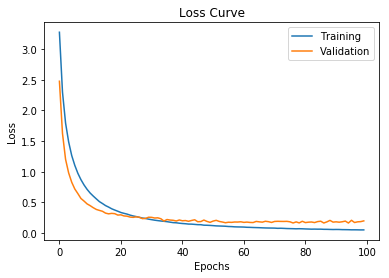

In [26]:
plt.plot(range(len(Tloss)), Tloss)
plt.plot(range(len(Vloss)), Vloss)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

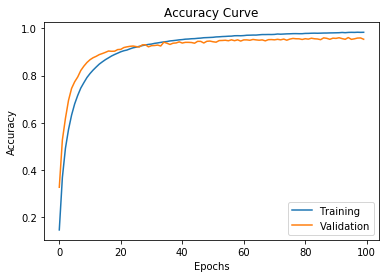

In [27]:
plt.plot(range(len(Tacc)), Tacc)
plt.plot(range(len(Vacc)), Vacc)
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()

In [28]:
sess.close()

#### Evaluate the model on the test data

In [29]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./mynet
Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def loadAndResizeImg(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    return img

In [30]:
import glob
imgs_folder = 'my_images/'
imgs_path = glob.glob(imgs_folder + '*.jpg')

my_labels = []
my_images = []

for path in imgs_path:
    my_images.append(loadAndResizeImg(path))
    my_labels.append(path.split('/')[-1].split('.')[0])

In [31]:
my_labels = np.array(my_labels, dtype=np.uint8)
my_images = np.array(my_images, dtype=np.uint8)

In [7]:
def plotMyImgs(sample_images, true_label=None, pred_label=None):
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 2, figsize=(8,12))
    fig.subplots_adjust(hspace=1, wspace=0.3)
    channels = sample_images.shape[:-1]
    for i, ax in enumerate(axes.flat):
        # Plot image.
        if i < len(sample_images):
            if channels == 3:
                ax.imshow(sample_images[i])
            else:
                ax.imshow(sample_images[i].squeeze(), cmap='gray')
            
            # TO-DO: Show true and predicted classes
            if true_label != None:
                if pred_label != None:
                    sign = "True: {0}\nPred: {1}".format(label_names[true_label[i]],label_names[pred_label[i]])
                else:
                    sign = "True: {}".format(label_names[true_label[i]])
                ax.set_title(sign)
            # Show the classes as the label on the x-axis.

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

/home/kanakiyab/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


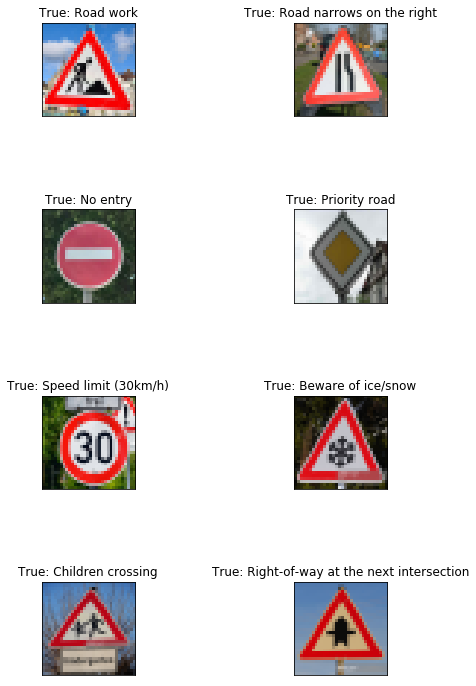

In [33]:
plotMyImgs(my_images, my_labels)

### Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
data_sess = tf.Session()
my_images_gray = tf.image.rgb_to_grayscale(my_images)
with data_sess.as_default():
    my_images_gray = my_images_gray.eval()
my_images = normalize(applyCLAHE(my_images_gray), 0.5, -0.5)
data_sess.close()
my_images = np.expand_dims(my_images, 3)

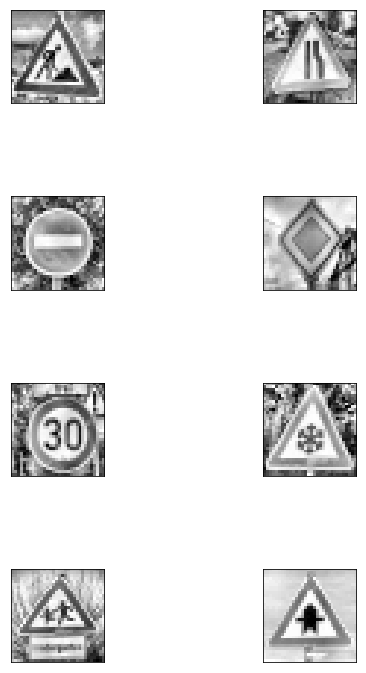

In [18]:
plotMyImgs(my_images)

In [75]:
def predict(X_images, sess):
    pred = sess.run(tf.argmax(tf.nn.softmax(logits), 1), feed_dict={x: X_images, keep_prob: 1})
    return pred

In [82]:
sess = tf.Session()
saver.restore(sess, tf.train.latest_checkpoint('.'))
pred_labels = predict(my_images, sess)
    
print(pred_labels)

INFO:tensorflow:Restoring parameters from ./mynet
[25 18 17 12  1 30 28 11]


/home/kanakiyab/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()
/home/kanakiyab/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


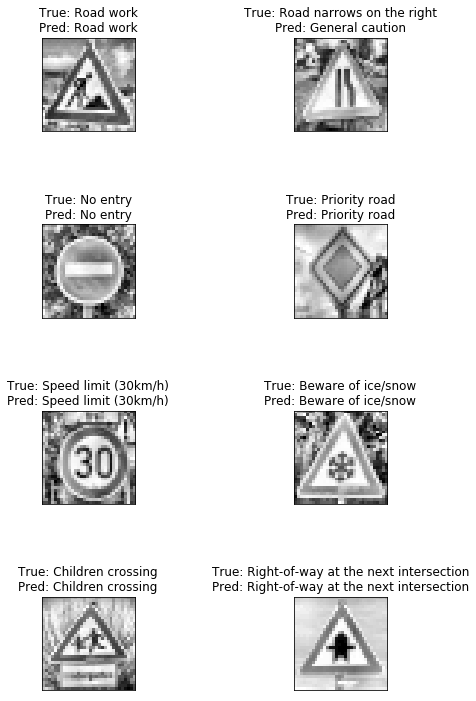

In [83]:
plotMyImgs(my_images, my_labels, pred_labels)

### Analyze Performance

In [84]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
accuracy = sess.run(accuracy_operation, feed_dict={x: my_images, y: my_labels, keep_prob: 1.0})

print("Accuracy on new images = {:.3f}".format(accuracy))

Accuracy on new images = 0.875


I wonder why the accuracy is reported as 0.75 whereas it is clearly, 0.875 (This was the case because each time I was loading a new session. Therefore, the values were different). The one sign that is mis-classified is the 'Road narrows on right' with 'General caution'. It is likely that the straight lines in the sign would make the neural network confused between both the signs. We can look at the top 5 probabilities next to investigate how far off the prediction is.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [85]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def printTopKProb(images, labels, sess, K=5):
    TopKV2 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=K), feed_dict={x: images, keep_prob: 1})
    
    for i in range(len(labels)):
        print("True Class - '{}'".format(label_names[labels[i]]))
        print("Top {} guesses  are as follows:".format(K)) 
        for j in range(K):
            print("Guess {0} - '{1}' (with probability {2:.5f})".format(j+1, label_names[TopKV2[1][i][j]], TopKV2[0][i][j]))
        print(" ")

In [86]:
K = 5
printTopKProb(my_images, my_labels, sess)

True Class - 'Road work'
Top 5 guesses  are as follows:
Guess 1 - 'Road work' (with probability 1.00000)
Guess 2 - 'Beware of ice/snow' (with probability 0.00000)
Guess 3 - 'Bumpy road' (with probability 0.00000)
Guess 4 - 'Traffic signals' (with probability 0.00000)
Guess 5 - 'Road narrows on the right' (with probability 0.00000)
 
True Class - 'Road narrows on the right'
Top 5 guesses  are as follows:
Guess 1 - 'General caution' (with probability 0.99673)
Guess 2 - 'Traffic signals' (with probability 0.00321)
Guess 3 - 'Pedestrians' (with probability 0.00003)
Guess 4 - 'Road narrows on the right' (with probability 0.00002)
Guess 5 - 'Bumpy road' (with probability 0.00000)
 
True Class - 'No entry'
Top 5 guesses  are as follows:
Guess 1 - 'No entry' (with probability 0.99979)
Guess 2 - 'Speed limit (100km/h)' (with probability 0.00020)
Guess 3 - 'Speed limit (20km/h)' (with probability 0.00001)
Guess 4 - 'Stop' (with probability 0.00000)
Guess 5 - 'Speed limit (120km/h)' (with probabi

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [87]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [88]:
outputFeatureMap(my_images[1], convLayer6, plt_num=64)

NameError: name 'convLayer6' is not defined

In [ ]:
# # These images are very slow, perhaps because I am trying to apply transformation to one image in a loop. 
# # A possible workaround is to generate many variations and process on batch. Then, just randomly select the
# # subset of the data and proceed with that
# # Scale images
# tf.reset_default_graph()
# def central_scale_images(X_imgs, scaleRange, labels):
#     """ 
#     This function generates same number of images as input 
#     images but, with a random scaled version of each between
#     the range specified in the scaleRange.
#     """
#     img_shape = X_imgs.shape[1:]
#     X = tf.placeholder(tf.float32, shape=[None, img_shape[0], img_shape[1], img_shape[2]])
#     X_scaled_data = []
# #     y_scaled = []
#     box_idx = np.zeros((1), dtype=np.int32)
#     crop_size = np.array([image_shape[0], image_shape[1]], dtype=np.int32)
    
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
        
#         for idx, img_data in enumerate(X_imgs):
#             scale = np.random.uniform(low=scaleRange[0], high=scaleRange[1])
#             x1 = y1 = 0.5 - 0.5*scale     # for central scale
#             x2 = y2 = 0.5 + 0.5*scale
#             box = np.array([x1, y1, x2, y2], dtype=np.float32, ndmin=2)
#             scaled_img = tf.image.crop_and_resize(X, box, box_idx, crop_size)

#             # Need to do it for each image otherwise it just does one.
#             img_data = np.expand_dims(img_data, axis=0)
#             scaled_img = sess.run(scaled_img, feed_dict={X: img_data})
#             X_scaled_data.extend(scaled_img)
# #             y_scaled.extend(labels[idx])
#     X_scaled_data = np.array(X_scaled_data, dtype=np.float32)
# #         y_scaled = np.array(y_scaled, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_scaled_data, y_scaled

# # translate images
# def get_translate_parameters_10(index, img_shape, factor):
#     # percent should be from the range 0-100. 100 is impractical.
#     # TO-DO: fix the confused notation of percent. The function would keep percent and translate by 1-percent
#     img_w = img_shape[1]
#     img_h = img_shape[0]
# #     translate_factor = percent/100
#     if index == 0: # Translate left by 10 percent
#         offset = np.array([0.0, 1-factor], dtype = np.float32)
#         size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
#         w_start = 0
#         w_end = int(ceil(factor * img_w))
#         h_start = 0
#         h_end = img_h
#     elif index == 1: # Translate right by 10 percent
#         offset = np.array([0.0, -(1-factor)], dtype = np.float32)
#         size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
#         w_start = int(floor((1 - factor) * img_w))
#         w_end = img_w
#         h_start = 0
#         h_end = img_h
#     elif index == 2: # Translate top by 10 percent
#         offset = np.array([(1-factor), 0.0], dtype = np.float32)
#         size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
#         w_start = 0
#         w_end = img_w
#         h_start = 0
#         h_end = int(ceil(factor * img_h)) 
#     else: # Translate bottom by 10 percent
#         offset = np.array([-(1 - factor), 0.0], dtype = np.float32)
#         size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
#         w_start = 0
#         w_end = img_w
#         h_start = int(floor((1 - factor) * img_h))
#         h_end = img_h 
        
#     return offset, size, w_start, w_end, h_start, h_end

# # translate images
# from math import ceil, floor
# def translate_images_10(X_imgs, labels, factor):
#     """
#     This function generates either of possible 4 translations
#     by 10%, at random.
#     The outpt shape is the same as the input shape.
#     """
#     offsets = np.zeros((len(X_imgs), 2), dtype = np.float32)
#     X_translated_arr = []
# #     y_translated = []
#     img_shape = X_imgs.shape[1:]
    
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         X_translated = np.zeros((len(X_imgs), img_shape[0], img_shape[1], img_shape[2]), \
#                                     dtype = np.float32)
#         X_translated.fill(255.0) # Filling background color
#         for idx, img_data in enumerate(X_imgs):
#             i = np.random.randint(high=4)
#             base_offset, size, w_start, w_end, h_start, h_end = get_translate_parameters_10(i, image_shape, factor)
#             offsets[:, :] = base_offset 
#             glimpse = tf.image.extract_glimpse(img_data, size, offsets)
            
#             glimpse = sess.run(glimpse)
#             X_translated[idx, h_start: h_start + size[0], \
#                          w_start: w_start + size[1], :] = glimpse
#             X_translated_arr.extend(X_translated)
# #             y_translated.extend(labels[idx])
#     X_translated_arr = np.array(X_translated, dtype=np.float32)
# #     y_translated = np.array(y_translated, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_translated_arr, labels

# # rotate images
# from math import pi
# def rotate_imgs(X_imgs, rotRange, labels):
#     X_rotate = []
# #     y_rotate = []
#     img_shape = X_imgs.shape[1:]
#     X = tf.placeholder(tf.float32, shape = [None, img_shape[0], img_shape[1], img_shape[2]])
#     radian = tf.placeholder(tf.float32)
#     tf_img = tf.contrib.image.rotate(X, radian)
    
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
    
#         for idx, img_data in enumerate(X_imgs):
#             degrees_angle = np.random.randint(low=rotRange[0], high=rotRange[1]+1)
#             radian_val = degrees_angle * pi / 180  # Convert to radian
#             rotated_img = sess.run(tf_img, feed_dict = {X: img_data, radian: radian_val})
#             X_rotate.extend(rotated_img)
# #             y_rotate.extend(labels[idx])

#     X_rotate = np.array(X_rotate, dtype = np.float32)
# #     y_rotate = np.array(y_rotate, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_rotate, labels

In [22]:
# # Supposedly faster, but apperently, using opencv functions is a better idea
# tf.reset_default_graph()
# def central_scale_images(X_imgs, scales, labels):
#     """ 
#     This function generates same number of images as input 
#     images but, with a random scaled version of each between
#     the range specified in the scaleRange.
#     """
#     img_shape = X_imgs.shape
#     boxes = np.zeros((len(scales), 4), dtype = np.float32)
#     for index, scale in enumerate(scales):
#         x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
#         x2 = y2 = 0.5 + 0.5 * scale
#         boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
#     box_ind = np.zeros((len(scales)), dtype = np.int32)
#     crop_size = np.array([image_shape[0], image_shape[1]], dtype=np.int32)
    
#     X_scale_data = []
#     y_scaled = []
#     X = tf.placeholder(tf.float32, shape=None)
#     # Define Tensorflow operation for all scales but only one base image at a time
#     tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
        
#         for idx, img_data in enumerate(X_imgs):
#             batch_img = np.expand_dims(img_data, axis=0)
#             scaled_imgs = sess.run(tf_img, feed_dict={X: batch_img})
#             X_scale_data.extend(scaled_imgs)
#             y_scaled.extend([labels[idx]]*len(boxes))
    
#     X_scale_data = np.array(X_scale_data, dtype = np.float32)
#     y_scaled = np.array(y_scaled, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_scale_data, y_scaled

# # translate images
# def get_translate_parameters(index, img_shape, factor):
#     # percent should be from the range 0-100. 100 is impractical.
#     # TO-DO: fix the confused notation of percent. The function would keep percent and translate by 1-percent
#     img_w = img_shape[1]
#     img_h = img_shape[0]
# #     translate_factor = percent/100
#     if index == 0: # Translate left by 10 percent
#         offset = np.array([0.0, 1-factor], dtype = np.float32)
#         size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
#         w_start = 0
#         w_end = int(ceil(factor * img_w))
#         h_start = 0
#         h_end = img_h
#     elif index == 1: # Translate right by 10 percent
#         offset = np.array([0.0, -(1-factor)], dtype = np.float32)
#         size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
#         w_start = int(floor((1 - factor) * img_w))
#         w_end = img_w
#         h_start = 0
#         h_end = img_h
#     elif index == 2: # Translate top by 10 percent
#         offset = np.array([(1-factor), 0.0], dtype = np.float32)
#         size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
#         w_start = 0
#         w_end = img_w
#         h_start = 0
#         h_end = int(ceil(factor * img_h)) 
#     else: # Translate bottom by 10 percent
#         offset = np.array([-(1 - factor), 0.0], dtype = np.float32)
#         size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
#         w_start = 0
#         w_end = img_w
#         h_start = int(floor((1 - factor) * img_h))
#         h_end = img_h 
        
#     return offset, size, w_start, w_end, h_start, h_end

# # translate images
# from math import ceil, floor
# def translate_images(X_imgs, labels, factor):
#     """
#     This function generates either of possible 4 translations
#     by 10%, at random.
#     The outpt shape is the same as the input shape.
#     """
#     offsets = np.zeros((len(X_imgs), 2), dtype = np.float32)
#     n_translations = 4
#     X_translated_arr = []
#     y_translated = []
#     img_shape = X_imgs.shape[1:]
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         for i in range(n_translations):
#             X_translated = np.zeros((len(X_imgs), img_shape[0], img_shape[1], img_shape[2]), \
#                                     dtype = np.float32)
#             X_translated.fill(0) # Filling background color
#             base_offset, size, w_start, w_end, h_start, h_end = get_translate_parameters(i, image_shape, factor)
#             offsets[:, :] = base_offset 
#             glimpses = tf.image.extract_glimpse(X_imgs, size, offsets)
            
#             glimpses = sess.run(glimpses)
#             X_translated[:, h_start: h_start + size[0], \
#                          w_start: w_start + size[1], :] = glimpses
#             X_translated_arr.extend(X_translated)
#             y_translated.extend(labels)
#     X_translated_arr = np.array(X_translated_arr, dtype=np.float32)
#     y_translated = np.array(y_translated, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_translated_arr, y_translated

# # rotate images
# from math import pi
# def rotate_imgs(X_imgs, rotRange, n_images, labels):
#     X_rotate = []
#     y_rotate = []
#     end_angle = rotRange[1]
#     start_angle = rotRange[0]
# #     iterate_at = (end_angle - start_angle) / (n_images - 1)
#     degree_arr = np.random.uniform(high=end_angle, low=start_angle, size=n_images)
#     img_shape = X_imgs.shape[1:]
#     tf.reset_default_graph()
#     X = tf.placeholder(tf.float32, shape = (None, img_shape[0], img_shape[1], img_shape[2]))
#     radian = tf.placeholder(tf.float32, shape = (len(X_imgs)))
#     tf_img = tf.contrib.image.rotate(X, radian)
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
    
#         for index in range(n_images):
#             degrees_angle = degree_arr[index]
#             if (np.abs(degrees_angle) > 2):
#                 print(index)
#                 radian_value = degrees_angle * pi / 180  # Convert to radian
#                 radian_arr = [radian_value] * len(X_imgs)
#                 rotated_imgs = sess.run(tf_img, feed_dict={X: X_imgs, radian: radian_arr})
#                 X_rotate.extend(rotated_imgs)
#                 y_rotate.extend(labels)

#     X_rotate = np.array(X_rotate, dtype=np.float32)
#     y_rotate = np.array(y_rotate, dtype=np.uint8)
#     tf.reset_default_graph()
#     return X_rotate, y_rotate

In [64]:
# ### Define your architecture here.
# ### Feel free to use as many code cells as needed.

# ### Use a VGG16 like architecture with dropout and batch normalization
# ### However, it will have smaller depth as the input image is only 32x32

# # important to reset the graph as it was used before for data augmentation
# # Add batch normalization
# tf.reset_default_graph()

# from tensorflow.contrib.layers import flatten

# def myNet(x):    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
#     weights = {
#                 'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 16], mean=mu, stddev=sigma)),
#                 'wc2': tf.Variable(tf.truncated_normal([3, 3, 16, 16], mean=mu, stddev=sigma)),
#                 'wc3': tf.Variable(tf.truncated_normal([3, 3, 16, 32], mean=mu, stddev=sigma)),
#                 'wc4': tf.Variable(tf.truncated_normal([3, 3, 32, 32], mean=mu, stddev=sigma)),
#                 'wc5': tf.Variable(tf.truncated_normal([3, 3, 32, 64], mean=mu, stddev=sigma)),
#                 'wc6': tf.Variable(tf.truncated_normal([3, 3, 64, 64], mean=mu, stddev=sigma)),
#                 'wf1': tf.Variable(tf.truncated_normal([1024, 1024], mean=mu, stddev=sigma)),
#                 'wf2': tf.Variable(tf.truncated_normal([1024, 1024], mean=mu, stddev=sigma)),
#                 'wout': tf.Variable(tf.truncated_normal([1024, 43], mean=mu, stddev=sigma))
#                 }
#     biases = {
#                 'bc1': tf.Variable(tf.zeros(16)),
#                 'bc2': tf.Variable(tf.zeros(16)),
#                 'bc3': tf.Variable(tf.zeros(32)),
#                 'bc4': tf.Variable(tf.zeros(32)),
#                 'bc5': tf.Variable(tf.zeros(64)),
#                 'bc6': tf.Variable(tf.zeros(64)),
#                 'bf1': tf.Variable(tf.zeros(1024)),
#                 'bf2': tf.Variable(tf.zeros(1024)),
#                 'bout': tf.Variable(tf.zeros(43))
#     }
    
#     #  Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x8.
#     convLayer1 = tf.nn.conv2d(input=x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer1 = tf.nn.bias_add(convLayer1, biases['bc1'])
#     #  Activation.
#     convLayer1 = tf.nn.relu(convLayer1)
#     #  Layer 2: Convolutional. Output = 32x32x8.
#     convLayer2 = tf.nn.conv2d(input=convLayer1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer2 = tf.nn.bias_add(convLayer2, biases['bc2'])
#     #  Activation.
#     convLayer2 = tf.nn.relu(convLayer2)
#     #  Pooling 1. Input = 32x32x8. Output = 16x16x8.
#     pool1 = tf.nn.max_pool(value=convLayer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
#     #  Dropout: Probability - 0.4
#     pool1 = tf.nn.dropout(pool1, keep_prob=0.9)
    
#     #  Layer 3: Convolutional. Input = 16x16x8. Output = 16x16x16.
#     convLayer3 = tf.nn.conv2d(input=pool1, filter=weights['wc3'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer3 = tf.nn.bias_add(convLayer3, biases['bc3'])
#     #  Activation.
#     convLayer3 = tf.nn.relu(convLayer3)
#     #  Layer 4: Convolutional. Output = 16x16x16.
#     convLayer4 = tf.nn.conv2d(input=convLayer3, filter=weights['wc4'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer4 = tf.nn.bias_add(convLayer4, biases['bc4'])
#     #  Activation.
#     convLayer4 = tf.nn.relu(convLayer4)
#     #  Pooling 2. Input = 16x16x16. Output = 8x8x16.
#     pool2 = tf.nn.max_pool(value=convLayer4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
#     #  Dropout: Probability - 0.4
#     pool2 = tf.nn.dropout(pool2, keep_prob=0.9)
    
#     #  Layer 5: Convolutional. Output = 8x8x32.
#     convLayer5 = tf.nn.conv2d(input=pool2, filter=weights['wc5'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer5 = tf.nn.bias_add(convLayer5, biases['bc5'])
#     #  Activation.
#     convLayer5 = tf.nn.relu(convLayer5)
#     #  Layer 6: Convolutional. Output = 8x8x32.
#     convLayer6 = tf.nn.conv2d(input=convLayer5, filter=weights['wc6'], strides=[1, 1, 1, 1], padding='SAME')
#     convLayer6 = tf.nn.bias_add(convLayer6, biases['bc6'])
#     #  Activation.
#     convLayer6 = tf.nn.relu(convLayer6)
#     #  Pooling 2. Input = 8x8x32. Output = 4x4x32.
#     pool3 = tf.nn.max_pool(value=convLayer6, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
#      #  Dropout: Probability - 0.4
#     pool3 = tf.nn.dropout(pool3, keep_prob=0.5)
    
#     #  Flatten. Input = 4x4x32. Output = 512.
#     fcLayer0 = flatten(pool3)
    
#     #  Layer 7: Fully Connected. Input = 512. Output = 512.
#     fcLayer1 = tf.add(tf.matmul(fcLayer0, weights['wf1']), biases['bf1'])
#     #  Activation.
#     fcLayer1 = tf.nn.relu(fcLayer1)
#     #  Dropout: Probability - 0.4
#     fcLayer1 = tf.nn.dropout(fcLayer1, keep_prob=0.4)
#     #  Layer 8: Fully Connected. Input = 512. Output = 512.
#     fcLayer2 = tf.add(tf.matmul(fcLayer1, weights['wf2']), biases['bf2'])
#     #  Activation.
#     fcLayer2 = tf.nn.relu(fcLayer2)        # This is a mistake.
#     # Dropout: Probability - 0.4
#     fcLayer2 = tf.nn.dropout(fcLayer2, keep_prob=0.4)
#     # Layer 9: Fully Connected. Input = 512. Output = 43.
#     logits = tf.add(tf.matmul(fcLayer2, weights['wout']), biases['bout'])
#     return logits